In [1]:
import numpy as np

import tsplib95
import networkx as nx
from networkx.algorithms.approximation import christofides

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp
import matplotlib.pyplot as plt




In [40]:
# read in graph instances/random_20_0.tsp
problem = tsplib95.load('Instances/random_20_0.tsp')
graph = problem.get_graph()
dist_matrix = nx.to_numpy_matrix(graph)
n = len(graph.nodes)
cities_matrix = np.zeros((n, 2))
for i in range(0, n):
    # ensure numpy matrix
    cities_matrix[i] = problem.get_display(i + 1)


In [41]:
def visualise(solution, cities, plot_title="TRP", filename="temp.png"):
    x = cities[:, 0]
    y = cities[:, 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='red')

    # Plot the solution path
    solution_x = x[solution]
    solution_y = y[solution]
    plt.plot(solution_x, solution_y, 'b-', linewidth=0.5)

    # Connect the last first cities, should not be needed as we're doing TRP instead of TSP, but it looks nicer
    plt.plot([solution_x[-1], solution_x[0]], [solution_y[-1], solution_y[0]], 'b-', linewidth=0.5)

    # Label each point with city index
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi, yi, str(i), color='black', ha='center', va='center')

    # Set plot title and labels
    plt.title(plot_title)

    plt.savefig(filename)
    plt.close()

In [42]:
# get TSP tour using nx
TSP = christofides(graph)
TSP.pop()
TSP = [x - 1 for x in TSP]
TSP


[0, 9, 14, 11, 12, 15, 10, 4, 16, 18, 1, 6, 5, 17, 13, 19, 7, 2, 3, 8]

In [43]:
# get the TRP tour using GILS
gilsrvnd_sol, gilsrvnd_cost, gilsrvnd_time = gilsrvnd.run("Instances/random_20_0.tsp")

In [45]:
visualise(gilsrvnd_sol, cities_matrix, "random_20_0 TRP Tour", "OptimalTRP.png")
visualise(TSP, cities_matrix, "random_20_0 TSP Tour", "OptimalTSP.png")

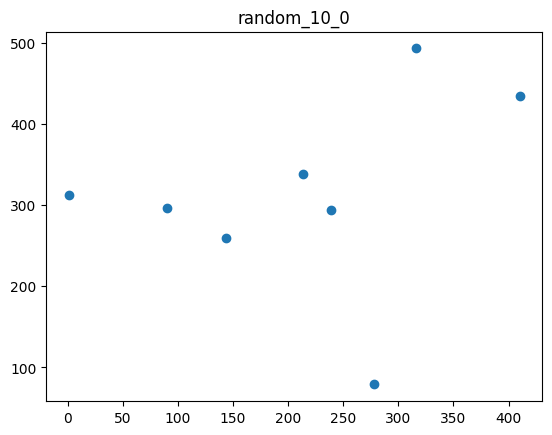

In [28]:
# plot bip_20_0.tsp
fn = "random_10_0.tsp"
with open('Instances/' + fn, 'r') as f:
    lines = f.readlines()
    points = []
    for line in lines[7:-1]:
        points.append([float(x) for x in line.split()[1:]])
    points = np.array(points)
    plt.scatter(points[:,0], points[:,1])
    plt.title(fn[:-4])
    plt.savefig('Images/'+ fn[:-4] + ".png")
    # save the image


In [15]:
# save the image
plt.savefig('bip_30_0.png')

<Figure size 640x480 with 0 Axes>

In [3]:
df = pd.read_csv("srandom.csv")
df

,file,n,m,ratio1,ratio2,density,avg_clustering,mst_size,tsp_approx,edge_min,...,closeness_std,closeness_var,closeness_q25,closeness_q75,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time
0,srandom_10_1.tsp,10,55,0.181818,5.5,1.222222,0.414072,9,78438.0,0.0,...,0.000092,8.524779e-09,0.000345,0.000492,59309.0,0.109016,69185.0,0.000000,59309.0,0.044516
1,srandom_15_11.tsp,15,120,0.125000,8.0,1.142857,0.421630,14,141877.0,0.0,...,0.000079,6.302363e-09,0.000329,0.000456,110331.0,0.241537,134487.0,0.002000,110331.0,0.092007
2,srandom_16_55.tsp,16,136,0.117647,8.5,1.133333,0.427203,15,171027.0,0.0,...,0.000091,8.320751e-09,0.000352,0.000508,118768.0,0.433086,159940.0,0.001009,118193.0,0.228065
3,srandom_18_53.tsp,18,171,0.105263,9.5,1.117647,0.424722,17,176552.0,0.0,...,0.000063,3.935094e-09,0.000330,0.000411,141565.0,0.553906,206389.0,0.001503,140809.0,0.186478
4,srandom_19_87.tsp,19,190,0.100000,10.0,1.111111,0.462766,18,138627.0,0.0,...,0.000071,5.052711e-09,0.000361,0.000463,133145.0,0.425085,187575.0,0.002503,134349.0,0.283005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,srandom_91_96.tsp,91,4186,0.021739,46.0,1.022222,0.367393,90,1930185.0,0.0,...,0.000066,4.317079e-09,0.000352,0.000459,1603056.0,30.021509,2692697.0,0.257267,1651652.0,43.846168
96,srandom_95_81.tsp,95,4560,0.020833,48.0,1.021277,0.387272,94,2021345.0,0.0,...,0.000052,2.721331e-09,0.000340,0.000424,1686640.0,39.880181,3065490.0,0.294402,1758693.0,41.918330
97,srandom_96_63.tsp,96,4656,0.020619,48.5,1.021053,0.384503,95,2105686.0,0.0,...,0.000065,4.246357e-09,0.000355,0.000460,1909301.0,33.306335,2808284.0,0.297344,1847337.0,45.883843
98,srandom_99_74.tsp,99,4950,0.020000,50.0,1.020408,0.383080,98,2229878.0,0.0,...,0.000068,4.648060e-09,0.000346,0.000461,2002650.0,46.667097,3304424.0,0.331193,1961511.0,60.949679


In [4]:
# find the minimum of the columns GILS_cost, DBMEA_cost, GRASP_cost, in case of a tie choose the column with the minimum time column
def findBest(row):
    cost_columns = ['GRASP_cost', 'GILS_cost', 'DBMEA_cost']
    min_cost = row[cost_columns].min()

    min_columns = row[[col for col in cost_columns if row[col] == min_cost]]

    if len(min_columns) == 1:
        return min_columns.index[0]
    else:
        time_columns = ["GRASP_time", "GILS_time", "DBMEA_time"]
        min_time = row[time_columns].min()
        min_time_columns = row[[col for col in time_columns if row[col] == min_time]]
        return min_time_columns.index[0]

In [5]:
df['min_method'] = df.apply(findBest, axis=1)

In [6]:
df

,file,n,m,ratio1,ratio2,density,avg_clustering,mst_size,tsp_approx,edge_min,...,closeness_var,closeness_q25,closeness_q75,GILS_cost,GILS_time,GRASP_cost,GRASP_time,DBMEA_cost,DBMEA_time,min_method
0,srandom_10_1.tsp,10,55,0.181818,5.5,1.222222,0.414072,9,78438.0,0.0,...,8.524779e-09,0.000345,0.000492,59309.0,0.109016,69185.0,0.000000,59309.0,0.044516,GRASP_time
1,srandom_15_11.tsp,15,120,0.125000,8.0,1.142857,0.421630,14,141877.0,0.0,...,6.302363e-09,0.000329,0.000456,110331.0,0.241537,134487.0,0.002000,110331.0,0.092007,GRASP_time
2,srandom_16_55.tsp,16,136,0.117647,8.5,1.133333,0.427203,15,171027.0,0.0,...,8.320751e-09,0.000352,0.000508,118768.0,0.433086,159940.0,0.001009,118193.0,0.228065,DBMEA_cost
3,srandom_18_53.tsp,18,171,0.105263,9.5,1.117647,0.424722,17,176552.0,0.0,...,3.935094e-09,0.000330,0.000411,141565.0,0.553906,206389.0,0.001503,140809.0,0.186478,DBMEA_cost
4,srandom_19_87.tsp,19,190,0.100000,10.0,1.111111,0.462766,18,138627.0,0.0,...,5.052711e-09,0.000361,0.000463,133145.0,0.425085,187575.0,0.002503,134349.0,0.283005,GILS_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,srandom_91_96.tsp,91,4186,0.021739,46.0,1.022222,0.367393,90,1930185.0,0.0,...,4.317079e-09,0.000352,0.000459,1603056.0,30.021509,2692697.0,0.257267,1651652.0,43.846168,GILS_cost
96,srandom_95_81.tsp,95,4560,0.020833,48.0,1.021277,0.387272,94,2021345.0,0.0,...,2.721331e-09,0.000340,0.000424,1686640.0,39.880181,3065490.0,0.294402,1758693.0,41.918330,GILS_cost
97,srandom_96_63.tsp,96,4656,0.020619,48.5,1.021053,0.384503,95,2105686.0,0.0,...,4.246357e-09,0.000355,0.000460,1909301.0,33.306335,2808284.0,0.297344,1847337.0,45.883843,DBMEA_cost
98,srandom_99_74.tsp,99,4950,0.020000,50.0,1.020408,0.383080,98,2229878.0,0.0,...,4.648060e-09,0.000346,0.000461,2002650.0,46.667097,3304424.0,0.331193,1961511.0,60.949679,DBMEA_cost


In [7]:
df["min_method"].value_counts()

min_method
DBMEA_cost    71
GILS_cost     21
GRASP_time     8
Name: count, dtype: int64

In [8]:
df2 = pd.read_csv("matrix_final.csv")
df2

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,between_var,between_q25,between_q75,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.000008,0.022051,0.026965,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.000065,0.021686,0.032662,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000591,0.020050,0.042040,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.000097,0.000000,0.006410,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.000788,0.033226,0.062177,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,line_90_5.tsp,55730.0,57558.0,157350.0,35.477098,36.326975,0.233857,GILS_cost,90,4095,...,0.000435,0.050520,0.072751,0.002192,0.004113,0.003227,0.000642,4.123292e-07,0.002620,0.003881
335,line_90_6.tsp,48884.0,45916.0,128976.0,30.191444,37.348990,0.232372,DBMEA_cost,90,4095,...,0.000730,0.049839,0.071527,0.002220,0.004410,0.003481,0.000709,5.026715e-07,0.002873,0.004060
336,line_90_7.tsp,51464.0,49038.0,124368.0,28.821121,44.483338,0.232510,DBMEA_cost,90,4095,...,0.000393,0.048856,0.069497,0.002238,0.005424,0.004240,0.000992,9.846681e-07,0.003531,0.005157
337,line_90_8.tsp,60845.0,65825.0,123373.0,28.282006,39.745050,0.231058,GILS_cost,90,4095,...,0.000680,0.049190,0.072960,0.002171,0.004137,0.003256,0.000649,4.205608e-07,0.002625,0.003914


In [14]:
# append
df3 = pd.concat([df2, df], ignore_index=True)
df3

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,between_var,between_q25,between_q75,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.000008,0.022051,0.026965,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.000065,0.021686,0.032662,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000591,0.020050,0.042040,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.000097,0.000000,0.006410,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.000788,0.033226,0.062177,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,srandom_91_96.tsp,1603056.0,1651652.0,2692697.0,30.021509,43.846168,0.257267,GILS_cost,91,4186,...,0.000005,0.012572,0.015648,0.000274,0.000522,0.000399,0.000066,4.317079e-09,0.000352,0.000459
435,srandom_95_81.tsp,1686640.0,1758693.0,3065490.0,39.880181,41.918330,0.294402,GILS_cost,95,4560,...,0.000006,0.011738,0.015896,0.000256,0.000490,0.000380,0.000052,2.721331e-09,0.000340,0.000424
436,srandom_96_63.tsp,1909301.0,1847337.0,2808284.0,33.306335,45.883843,0.297344,DBMEA_cost,96,4656,...,0.000007,0.011653,0.015989,0.000278,0.000536,0.000404,0.000065,4.246357e-09,0.000355,0.000460
437,srandom_99_74.tsp,2002650.0,1961511.0,3304424.0,46.667097,60.949679,0.331193,DBMEA_cost,99,4950,...,0.000007,0.011239,0.015325,0.000288,0.000540,0.000406,0.000068,4.648060e-09,0.000346,0.000461


In [15]:
# save as matrix_super.csv
df3.to_csv('matrix_super.csv', index=False)

In [45]:
# save matrix_all as csv
#matrix_all.to_csv('matrix_good.csv', index=False)

In [1]:
# load matrix_final
matrix_final = pd.read_csv('matrix_final.csv')
matrix_final

NameError: name 'pd' is not defined

In [ ]:
# min method value counts as percentage and multiply by 100
matrix_final["min_method"].value_counts(normalize=True)